<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Pauta_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La viña **Casillero del Diablo** es una reconocida bodega que produce una amplia gama de vinos de alta calidad en la zona centro del país.
Con el objetivo de mejorar la calidad del producto y optimizar el proceso de producción, la bodega ha decidido utilizar técnicas avanzadas de **machine learning** para clasificar sus variedades de vino.
Así, para llevar a cabo este proyecto, se le pide a usted que realice un análisis del conjunto de datos *load_wine* de *sklearn*, que contiene información química y física sobre diferentes tipos de vino.

##Librerías a utilizar

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

##Cargar el Dataset

In [254]:
#Dataset certamen:
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

##Desarrollo Certamen

1. Escale los datos asociados a las variables x **[5 ptos]**

In [255]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [256]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [257]:
columnas = data.feature_names

2. A través del método del codo, muestre gráficamente cuál es el número óptimo de clusters **[5 ptos]**

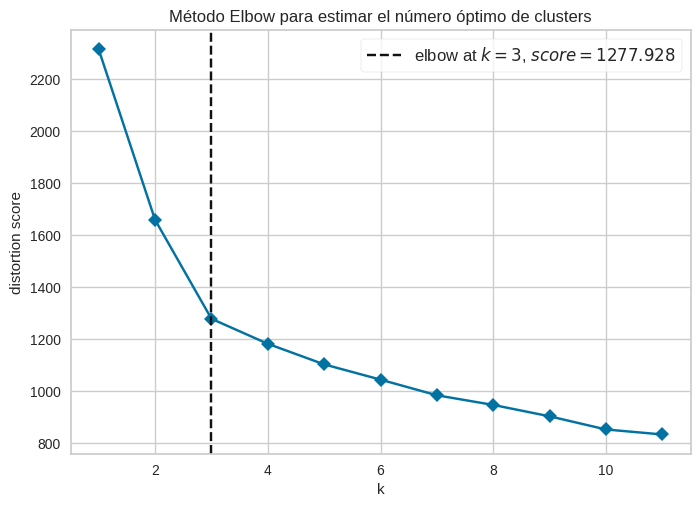

In [258]:
#Generamos el método Elbow para ver cuántos clusters generar en K-means
modelo = KMeans(random_state=100)

visualizer = KElbowVisualizer(
    modelo,
    k=(1,12),
    metric='distortion',
    title='Método Elbow para estimar el número óptimo de clusters',
    timings=False,
    locate_elbow=True,
    colors='coolwarm',
    show_metric=False
)

visualizer.fit(X_scaled)
visualizer.show()

plt.show()

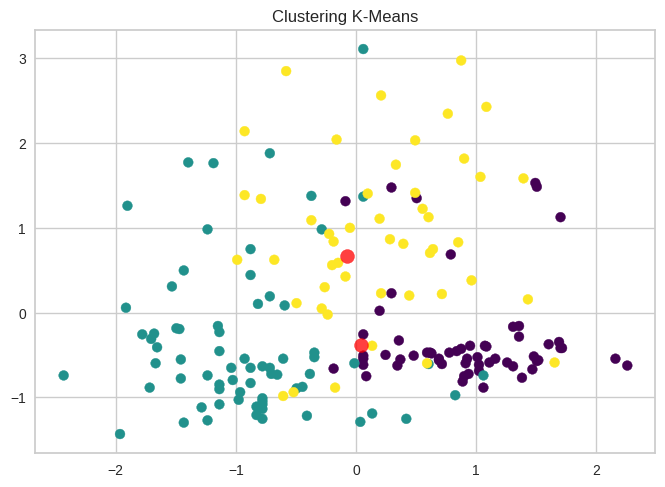

In [216]:
# Visualizar las etiquetas
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)
plt.title('Clustering K-Means')
plt.show()


3. El gerente comercial le indica que para el análisis de sus productos, solo le interesa atacar 2 segmentos distintos de clientes basados en solo 2 clusters de vinos. Para esto, **defina y grafique** un modelo de K-Means con 2 clusters, considerando un máximo de 600 iteraciones (max_iter) y 10 iteraciones con centroides distintos (n_init) **[5 ptos]**

In [259]:
# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=2, max_iter=600, n_init=10, random_state=500)

#Obtener el cluster al que pertenecen los datos:
y_kmeans = kmeans.fit_predict(X_scaled)

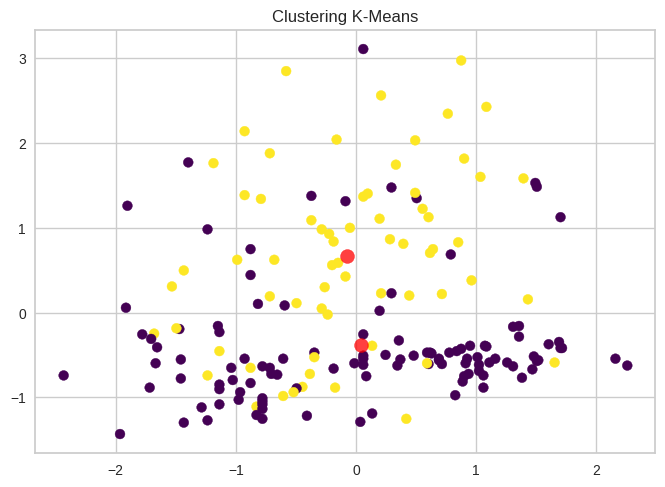

In [260]:
# Visualizar los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)
plt.title('Clustering K-Means')
plt.show()


4. Pase el conjunto de datos a un dataframe, considerando las variables X escaladas. Luego, agregue la variable del cluster como etiqueta ***y*** llámandola "Target". Muestre finalmente las 5 primeras filas **[3 ptos]**

In [261]:
#Pasar a DataFrame
df = pd.DataFrame(X_scaled, columns=columnas)

In [262]:
#Agregamos el cluster de cada fila y la variable predictora
df['Target'] = y_kmeans

In [249]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [264]:
df['Target'].value_counts()

Target
0    113
1     65
Name: count, dtype: int64

5. Defina sus variables X (escaladas) y su variable a predecir Y (Target), para luego definir un set de entrenamiento y testeo con un 80% de entrenamiento **[2 ptos]**

In [265]:
# Para seleccionar los datos sin el primer clúster (Cluster 0) en el Array
X = X_scaled
Y = df['Target']

In [266]:
# Separamos un 20% para testeo solo del cluster 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

##Árboles de Decisión##

6. Defina un modelo de Árboles de decisión con una función de división de entropía, una profundidad máxima de 2, un número mínimo de muestras de 3, una semilla = 5 y un criterio alpha para la poda de costos = 0.05 (ccp_alpha) **[2 ptos]**

In [281]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3, ccp_alpha=0.05, random_state=5)
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=2,
                       min_samples_leaf=3, random_state=5)

7. Entrene el modelo **[2 ptos]**

In [282]:
# Entrenamos el modelo
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=2,
                       min_samples_leaf=3, random_state=5)

8. Grafique el árbol entrenado **[2 ptos]**

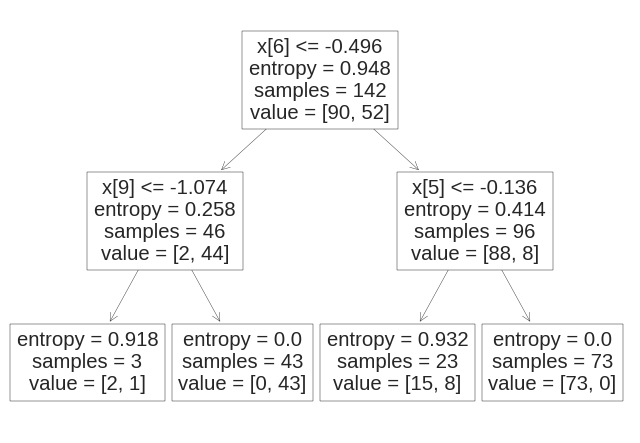

In [283]:
#Graficamos el árbol de decisión
plot_tree(arbol);

9. Realice la predicción de Y, considerando el conjunto de testeo **[2 ptos]**

In [284]:
#Generamos la predicción en el conjunto de testeo
Y_pred = arbol.predict(X_test)

10. Genere la matriz de confusión del modelo e indique cuál es su nivel de Precisión (Accuracy ) **[2 ptos]**

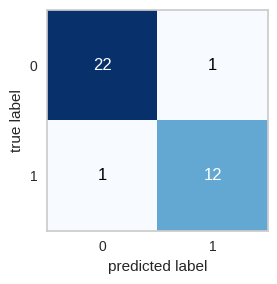

In [285]:
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(3,3), show_normed=False)
plt.tight_layout()

In [286]:
# veamos que tan bien le fue a este modelo en el testeo:
print(classification_report(y_true=Y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



##Support Vector Machine##

11. Genere un modelo de Support Vector Machine, con un kernel polinomial, una semilla = 5 y un regularizador (C) = 0.75 **[2 ptos]**

In [292]:
#Instanciamos
sup_vector = svm.SVC(kernel='rbf', C=0.75, random_state=5)

12. Entrene el modelo **[2 ptos]**

In [293]:
sup_vector.fit(X_train, Y_train)

SVC(C=0.75, random_state=5)

13. Realice la predicción de Y, considerando el conjunto de testeo **[2 ptos]**

In [294]:
Y_pred = sup_vector.predict(X_test)

14. Genere la matriz de confusión del modelo e indique cuál es su nivel de Precisión (Accuracy ) **[2 ptos]**

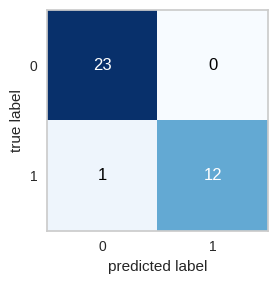

In [295]:
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(3,3), show_normed=False)
plt.tight_layout()

In [296]:
# veamos que tan bien le fue a este modelo en el testeo:
print(classification_report(y_true=Y_test,y_pred=sup_vector.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



15. En una red neuronal, ¿cuántas neuronas de salida debe tener el modelo para predecir este mismo ejercicio? ¿Qué función de activación debiese tener? **[2 ptos]**

In [ ]:
#Puede tener 1 neurona de salida con función de activación sigmoidal
#Puede tener 2 neuronas de salida con función softmax